In [ ]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c3f865da56f03ae2d3450b5b66f845f7fcda6a40251ed8cb939cff53a87a7e75
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


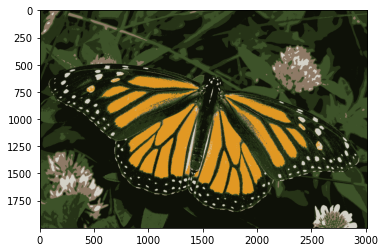

In [ ]:
import math
import skimage.io
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import skfuzzy as fuzz

# Reading the image
image = cv2.imread('monarch.jpg')

# Changing color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_n = image.reshape(image.shape[0]*image.shape[1], image.shape[2]).transpose()

def change_color_fuzzycmeans(cluster_membership, clusters):
    img = []
    for pix in cluster_membership.T:
        img.append(clusters[np.argmax(pix)])
    return img

cntr, u, u0, d, jm, p, fpc =fuzz.cluster.cmeans(image_n,6,2,0.000005,1000000)

new_img = change_color_fuzzycmeans(u,cntr)
fuzzy_img = np.reshape(new_img,image.shape).astype(np.int)

plt.imshow(fuzzy_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


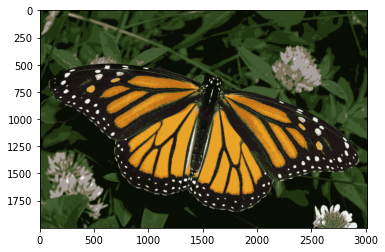

In [ ]:
# With clusters = 10
cntr, u, u0, d, jm, p, fpc =fuzz.cluster.cmeans(image_n,10,2,0.000005,100)

new_img = change_color_fuzzycmeans(u,cntr)
fuzzy_img = np.reshape(new_img,image.shape).astype(np.int)

plt.imshow(fuzzy_img)